In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_alive
import os

# Application Records Dataset

In [2]:
application_records = pd.read_csv("Datasets/non_labeled_combined_dataset.csv", index_col=0)

In [3]:
application_records.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,MONTHS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Tertiary education,Married,Rented apartment,32,149,1,1,0,0,Other,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Tertiary education,Married,Rented apartment,32,149,1,1,0,0,Other,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,37,1,0,0,0,Labourer,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,100,1,0,1,1,Sales,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,100,1,0,1,1,Sales,1.0,0


In [4]:
# Display the dimensionality of application_records DataFrame
application_records.shape

(35902, 19)

In [5]:
# Detect missing values in application_records DataFrame
application_records.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE                    0
MONTHS_EMPLOYED        0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [6]:
#Check application_records DataFrame for duplicate records
application_records[application_records.duplicated()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,MONTHS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS


In [7]:
application_records = application_records.drop_duplicates(subset=application_records.columns[1:], keep='first', inplace=False)

In [8]:
# Display the dimensionality of application_records DataFrame after dropping duplicates
application_records.shape

(9636, 19)

In [9]:
application_records.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE', 'MONTHS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'STATUS'],
      dtype='object')

In [10]:
application_records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9636 entries, 0 to 434812
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9636 non-null   int64  
 1   CODE_GENDER          9636 non-null   object 
 2   FLAG_OWN_CAR         9636 non-null   object 
 3   FLAG_OWN_REALTY      9636 non-null   object 
 4   CNT_CHILDREN         9636 non-null   int64  
 5   AMT_INCOME_TOTAL     9636 non-null   float64
 6   NAME_INCOME_TYPE     9636 non-null   object 
 7   NAME_EDUCATION_TYPE  9636 non-null   object 
 8   NAME_FAMILY_STATUS   9636 non-null   object 
 9   NAME_HOUSING_TYPE    9636 non-null   object 
 10  AGE                  9636 non-null   int64  
 11  MONTHS_EMPLOYED      9636 non-null   int64  
 12  FLAG_MOBIL           9636 non-null   int64  
 13  FLAG_WORK_PHONE      9636 non-null   int64  
 14  FLAG_PHONE           9636 non-null   int64  
 15  FLAG_EMAIL           9636 non-null  

In [11]:
application_records= application_records.rename(columns={"CODE_GENDER": "Gender",
                                    "FLAG_OWN_CAR": "Car",
                                    "FLAG_OWN_REALTY":"Realty",
                                    "CNT_CHILDREN":"Children_count",
                                    "AMT_INCOME_TOTAL": "Annual_income",
                                    "NAME_INCOME_TYPE": "Income_type",
                                    "NAME_EDUCATION_TYPE": "Education_type",
                                    "NAME_FAMILY_STATUS": "Family_status",
                                    "NAME_HOUSING_TYPE": "Housing_type",
                                    "AGE": "Age",
                                    "MONTHS_EMPLOYED": "Months_employed",
                                    "FLAG_MOBIL": "Mobile",
                                    "FLAG_WORK_PHONE": "Work_phone",
                                    "FLAG_PHONE":"Phone",
                                    "FLAG_EMAIL": "Email",
                                    "OCCUPATION_TYPE": "Occupation_type",
                                    "CNT_FAM_MEMBERS": "Family_members_count",
                                    "STATUS":"Status"})

In [12]:
# should we drop rows with null occupation type?

In [13]:
application_records.describe()

,ID,Children_count,Annual_income,Age,Months_employed,Mobile,Work_phone,Phone,Email,Family_members_count,Status
count,9.636000e+03,9636.000000,9636.000000,9636.000000,9636.000000,9636.0,9636.000000,9636.000000,9636.000000,9636.000000,9636.000000
mean,5.076030e+06,0.385949,182084.968244,43.037049,68.765463,1.0,0.221669,0.292549,0.089871,2.140515,0.044521
std,4.094643e+04,0.651983,96375.053404,11.536228,76.343067,0.0,0.415391,0.454957,0.286012,0.837977,0.206259
min,5.008804e+06,0.000000,36900.000000,20.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.036920e+06,0.000000,112500.000000,33.000000,12.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.069354e+06,0.000000,157500.000000,42.000000,46.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.113022e+06,1.000000,225000.000000,52.000000,99.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150479e+06,3.000000,945000.000000,68.000000,516.000000,1.0,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
# Change the data type to string
#application_records['Gender'] = application_records['Gender'].astype("string")
#application_records['Car'] = application_records['Car'].astype("string")
#application_records['Realty'] = application_records['Realty'].astype("string")
#application_records['Income_type'] = application_records['Income_type'].astype("string")
#application_records['Education_type'] = application_records['Education_type'].astype("string")
#application_records['Family_status'] = application_records['Family_status'].astype("string")
#application_records['Housing_type'] = application_records['Housing_type'].astype("string")
#application_records['Occupation_type'] = application_records['Occupation_type'].astype("string")

In [15]:
application_records["Income_type"].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [16]:
df= application_records.rename(columns={"Status": "Loan_status"})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9636 entries, 0 to 434812
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    9636 non-null   int64  
 1   Gender                9636 non-null   object 
 2   Car                   9636 non-null   object 
 3   Realty                9636 non-null   object 
 4   Children_count        9636 non-null   int64  
 5   Annual_income         9636 non-null   float64
 6   Income_type           9636 non-null   object 
 7   Education_type        9636 non-null   object 
 8   Family_status         9636 non-null   object 
 9   Housing_type          9636 non-null   object 
 10  Age                   9636 non-null   int64  
 11  Months_employed       9636 non-null   int64  
 12  Mobile                9636 non-null   int64  
 13  Work_phone            9636 non-null   int64  
 14  Phone                 9636 non-null   int64  
 15  Email              

In [18]:
df["Education_type"].unique()

array(['Tertiary education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary'], dtype=object)

/Users/samra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


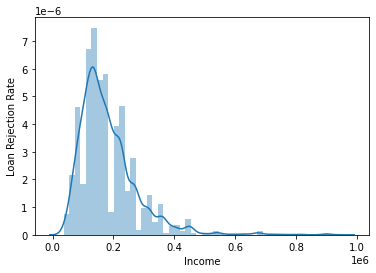

In [19]:
# Annual Income
income_plot = pd.Series(df.Annual_income, name="Income")
plt.ylabel('Loan Rejection Rate')
sns.distplot(income_plot)
plt.show()

/Users/samra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



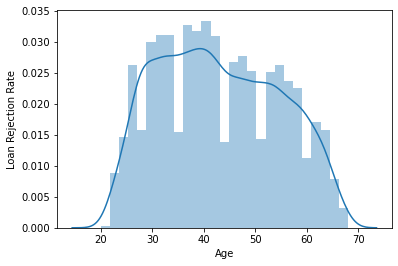

<Figure size 432x288 with 0 Axes>

In [35]:
# Age
age_plot = pd.Series(df.Age, name="Age")
plt.ylabel('Loan Rejection Rate')
sns.distplot(age_plot)
plt.show()
plt.savefig('age.png')

/Users/samra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



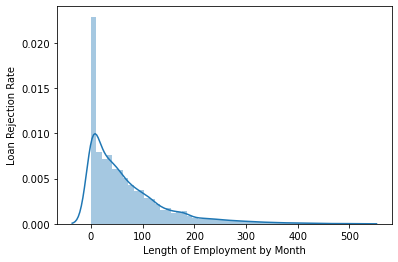

<Figure size 432x288 with 0 Axes>

In [40]:
# Employment Length
employment_length_plot = pd.Series(df.Months_employed, name="Length of Employment by Month")
plt.ylabel('Loan Rejection Rate')
sns.distplot(employment_length_plot)
plt.show()
plt.savefig('employmentlength.jpg')

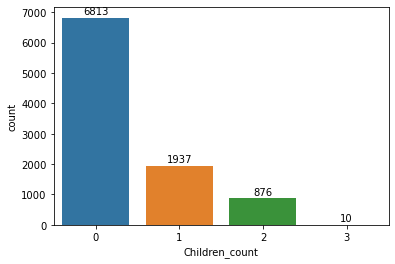

In [39]:
# Children Count
sns.countplot(x="Children_count", data=df)
Children_count = df.Children_count.value_counts()
for a,b in zip(range(len(Children_count)), Children_count):
    plt.text(a, b+50, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.show()

In [23]:
df.reset_index(inplace=True)
df.head(5)

,index,ID,Gender,Car,Realty,Children_count,Annual_income,Income_type,Education_type,Family_status,Housing_type,Age,Months_employed,Mobile,Work_phone,Phone,Email,Occupation_type,Family_members_count,Loan_status
0,0,5008804,M,Y,Y,0,427500.0,Working,Tertiary education,Married,Rented apartment,32,149,1,1,0,0,Other,2.0,0
1,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,37,1,0,0,0,Labourer,2.0,0
2,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,100,1,0,1,1,Sales,1.0,0
3,7,5008812,F,N,Y,0,283500.0,Pensioner,Tertiary education,Separated,House / apartment,61,0,1,0,0,0,Other,1.0,0
4,10,5008815,M,Y,Y,0,270000.0,Working,Tertiary education,Married,House / apartment,46,25,1,1,1,1,Admin,2.0,0


In [24]:
categorical_columns = ['Gender', 'Car', 'Realty','Children_count', 'Education_type', 'Income_type', 'Family_status','Occupation_type']

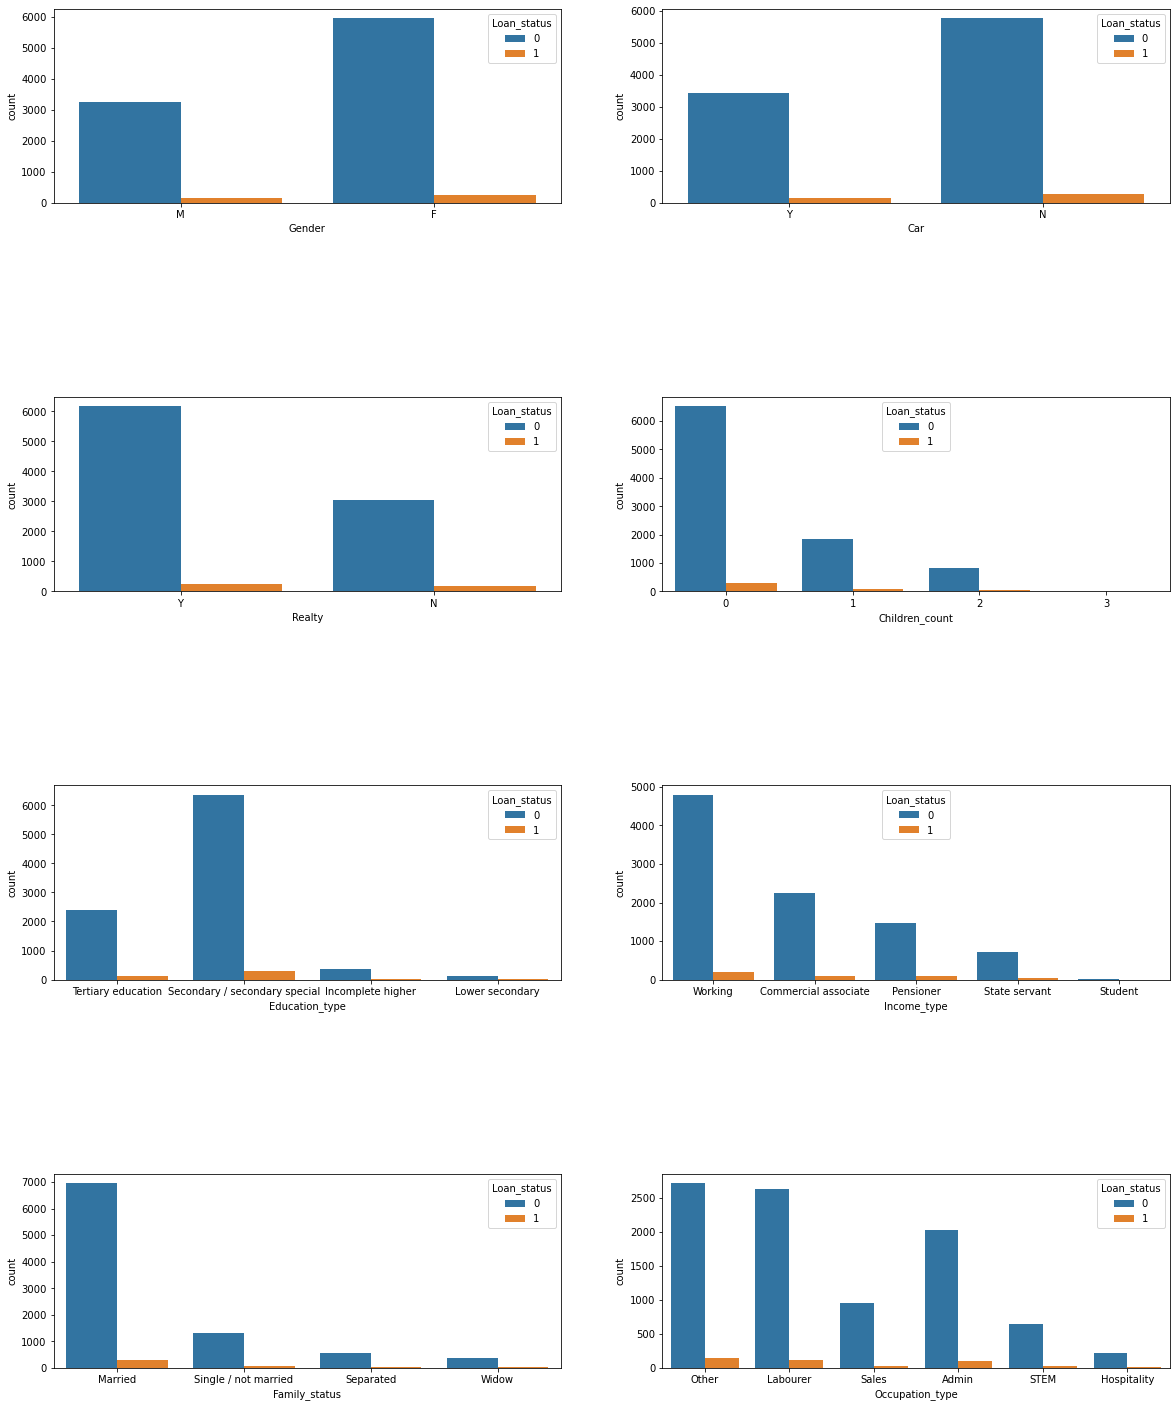

In [25]:
fig,axes = plt.subplots(4,2,figsize=(20,25))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [26]:
numerical_columns = ['Annual_income', 'Age', 'Months_employed']

       Annual_income          Age  Months_employed
count    9636.000000  9636.000000      9636.000000
mean   182084.968244    43.037049        68.765463
std     96375.053404    11.536228        76.343067
min     36900.000000    20.000000         0.000000
25%    112500.000000    33.000000        12.000000
50%    157500.000000    42.000000        46.000000
75%    225000.000000    52.000000        99.000000
max    945000.000000    68.000000       516.000000


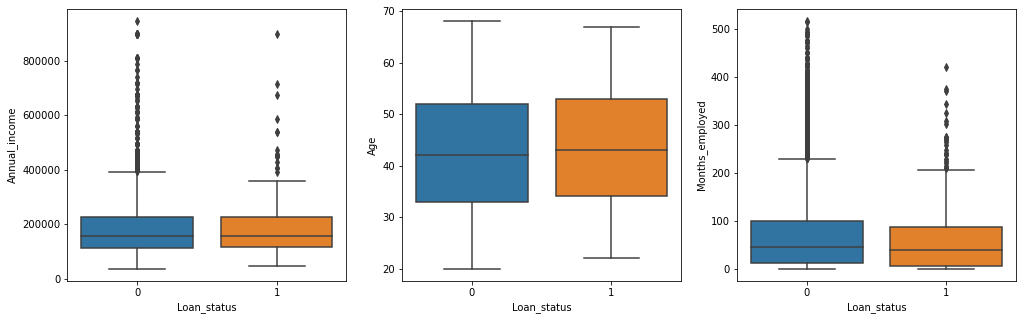

In [27]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [28]:
cols=['Annual_income','Loan_status']
df2=df[cols]

In [29]:
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [30]:
cf.go_offline() #will make cufflinks offline
cf.set_config_file(offline=False, world_readable=True)

In [31]:
df2.iplot()

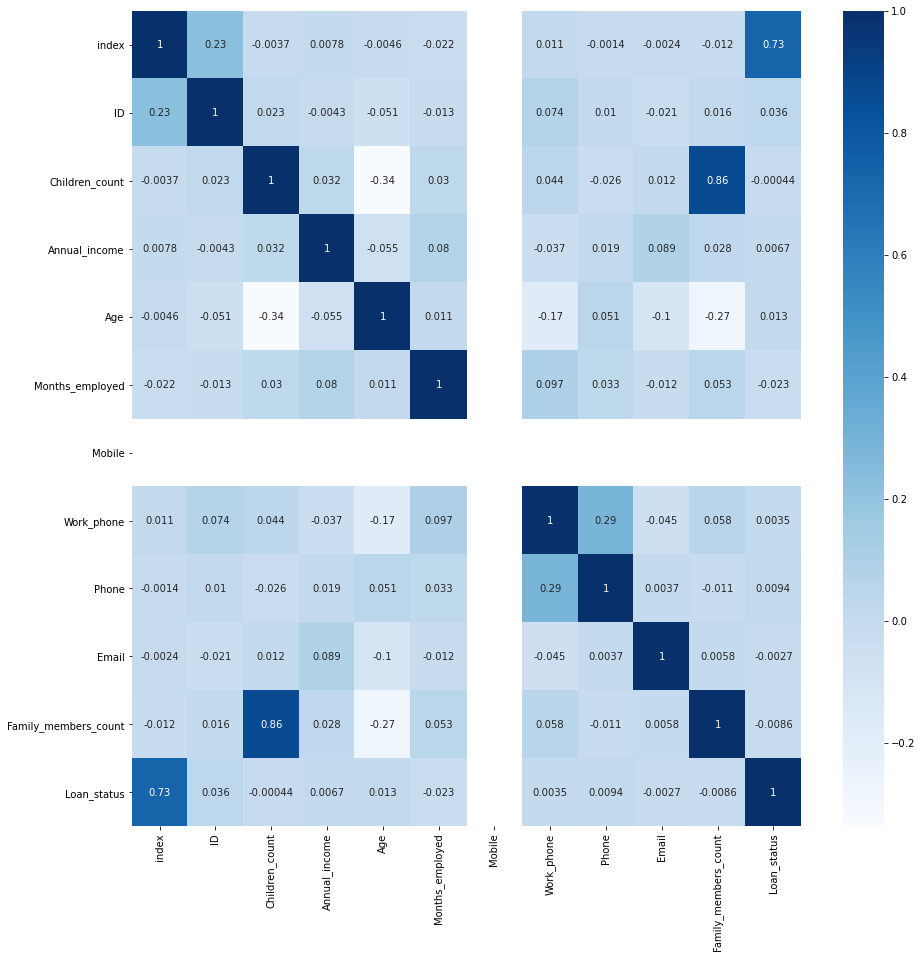

In [41]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()